In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"C:\Users\111\Win_pred\Win_Prediction_Data.xlsx")
data

Client Category Solution Type  Deal Date     Sector Location  \
0             Telecom    Solution 7 2012-03-27  Sector 24       L5   
1             Telecom    Solution 7 2012-09-25  Sector 24       L5   
2            Internal   Solution 59 2011-08-01  Sector 20   Others   
3            Internal   Solution 59 2011-04-28  Sector 20   Others   
4            Internal   Solution 32 2011-06-03  Sector 20   Others   
...               ...           ...        ...        ...      ...   
10056       Power ind    Solution 9 2019-03-18   Sector 9       L5   
10057        Internal    Solution 6 2019-03-04  Sector 20   Others   
10058       Power ind    Solution 9 2019-02-28   Sector 9       L5   
10059       Power ind   Solution 62 2019-01-27   Sector 9       L5   
10060          Others    Solution 9 2019-05-30  Sector 12      L10   

               VP Name     Manager Name   Deal Cost Deal Status Code  
0          Ekta Zutshi  Gopa Trilochana   150000.00              Won  
1          Ekta Zutshi  Gopa Trilochana   744705.88              Won  
2          Ekta Zutshi   Russell Dahlen    60000.00             Lost  
3          Ekta Zutshi   Russell Dahlen    60000.00             Lost  
4          Ekta Zutshi   Russell Dahlen    80882.35             Lost  
...                ...              ...         ...              ...  
10056  Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057  Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058  Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059      Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060  Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[10061 rows x 9 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


# HANDLING MISSING VALUES

In [4]:
data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [5]:
df=data[data['Client Category'].isnull()]
df

Client Category Solution Type  Deal Date     Sector Location  \
488              NaN    Solution 7 2018-10-05  Sector 12      L10   
491              NaN    Solution 7 2019-01-06  Sector 12      L10   
518              NaN   Solution 10 2012-01-12  Sector 19      L10   
732              NaN   Solution 10 2013-11-08  Sector 23      L10   
1128             NaN   Solution 37 2013-09-27  Sector 24      L10   
...              ...           ...        ...        ...      ...   
9477             NaN   Solution 32 2018-09-26  Sector 23      L10   
9753             NaN    Solution 9 2018-08-04  Sector 19      L10   
9819             NaN    Solution 9 2018-09-15  Sector 19      L10   
9904             NaN   Solution 14 2018-11-29  Sector 12      L10   
9993             NaN    Solution 9 2019-02-09  Sector 24      L10   

               VP Name     Manager Name  Deal Cost Deal Status Code  
488    Ankita Aggarwal    Kizzie Troxel  441176.47             Lost  
491    Ankita Aggarwal    Kizzie Troxel  441176.47             Lost  
518   Mangesh K. Singh   Hardeep Suksma   38235.29              Won  
732     Rosanna Maynez      Sohil Kumar   58823.53              Won  
1128    Mervin Harwood    Marcelo Riles  311764.71             Lost  
...                ...              ...        ...              ...  
9477    Long Bergstrom        Md Irshad  588235.29             Lost  
9753   Gopa Trilochana  Darla Dickinson  485294.12              Won  
9819      Clinton Mani  Sanchita Gulati  720588.24              Won  
9904  Mangesh K. Singh    keshar ansari  529411.77              Won  
9993   Gopa Trilochana        Ali Rafiq  227941.18              Won  

[79 rows x 9 columns]

In [6]:
sol=df['Solution Type'].unique()
sol

array(['Solution 7', 'Solution 10', 'Solution 37', 'Solution 31',
       'Solution 67', 'Solution 32', 'Solution 6', 'Solution 39',
       'Solution 28', 'Solution 12', 'Solution 4', 'Solution 29',
       'Solution 8', 'Solution 42', 'Solution 38', 'Solution 9',
       'Solution 14'], dtype=object)

In [7]:
for i in sol:
    df.loc[df['Solution Type']==i,'Client Category']=data.loc[data['Solution Type']==i,'Client Category'].mode().values[0]
df

Client Category Solution Type  Deal Date     Sector Location  \
488    Domestic Public Bank    Solution 7 2018-10-05  Sector 12      L10   
491    Domestic Public Bank    Solution 7 2019-01-06  Sector 12      L10   
518                  Others   Solution 10 2012-01-12  Sector 19      L10   
732                  Others   Solution 10 2013-11-08  Sector 23      L10   
1128                 Others   Solution 37 2013-09-27  Sector 24      L10   
...                     ...           ...        ...        ...      ...   
9477         Services_based   Solution 32 2018-09-26  Sector 23      L10   
9753                 Others    Solution 9 2018-08-04  Sector 19      L10   
9819                 Others    Solution 9 2018-09-15  Sector 19      L10   
9904  Domestic Private Bank   Solution 14 2018-11-29  Sector 12      L10   
9993                 Others    Solution 9 2019-02-09  Sector 24      L10   

               VP Name     Manager Name  Deal Cost Deal Status Code  
488    Ankita Aggarwal    Kizzie Troxel  441176.47             Lost  
491    Ankita Aggarwal    Kizzie Troxel  441176.47             Lost  
518   Mangesh K. Singh   Hardeep Suksma   38235.29              Won  
732     Rosanna Maynez      Sohil Kumar   58823.53              Won  
1128    Mervin Harwood    Marcelo Riles  311764.71             Lost  
...                ...              ...        ...              ...  
9477    Long Bergstrom        Md Irshad  588235.29             Lost  
9753   Gopa Trilochana  Darla Dickinson  485294.12              Won  
9819      Clinton Mani  Sanchita Gulati  720588.24              Won  
9904  Mangesh K. Singh    keshar ansari  529411.77              Won  
9993   Gopa Trilochana        Ali Rafiq  227941.18              Won  

[79 rows x 9 columns]

In [8]:
df1 = data.drop(data[data['Client Category'].isna()].index)
df1

Client Category Solution Type  Deal Date     Sector Location  \
0             Telecom    Solution 7 2012-03-27  Sector 24       L5   
1             Telecom    Solution 7 2012-09-25  Sector 24       L5   
2            Internal   Solution 59 2011-08-01  Sector 20   Others   
3            Internal   Solution 59 2011-04-28  Sector 20   Others   
4            Internal   Solution 32 2011-06-03  Sector 20   Others   
...               ...           ...        ...        ...      ...   
10056       Power ind    Solution 9 2019-03-18   Sector 9       L5   
10057        Internal    Solution 6 2019-03-04  Sector 20   Others   
10058       Power ind    Solution 9 2019-02-28   Sector 9       L5   
10059       Power ind   Solution 62 2019-01-27   Sector 9       L5   
10060          Others    Solution 9 2019-05-30  Sector 12      L10   

               VP Name     Manager Name   Deal Cost Deal Status Code  
0          Ekta Zutshi  Gopa Trilochana   150000.00              Won  
1          Ekta Zutshi  Gopa Trilochana   744705.88              Won  
2          Ekta Zutshi   Russell Dahlen    60000.00             Lost  
3          Ekta Zutshi   Russell Dahlen    60000.00             Lost  
4          Ekta Zutshi   Russell Dahlen    80882.35             Lost  
...                ...              ...         ...              ...  
10056  Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057  Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058  Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059      Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060  Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[9982 rows x 9 columns]

In [9]:
df2=pd.concat([df,df1],axis=0)
df2

Client Category Solution Type  Deal Date     Sector Location  \
488    Domestic Public Bank    Solution 7 2018-10-05  Sector 12      L10   
491    Domestic Public Bank    Solution 7 2019-01-06  Sector 12      L10   
518                  Others   Solution 10 2012-01-12  Sector 19      L10   
732                  Others   Solution 10 2013-11-08  Sector 23      L10   
1128                 Others   Solution 37 2013-09-27  Sector 24      L10   
...                     ...           ...        ...        ...      ...   
10056             Power ind    Solution 9 2019-03-18   Sector 9       L5   
10057              Internal    Solution 6 2019-03-04  Sector 20   Others   
10058             Power ind    Solution 9 2019-02-28   Sector 9       L5   
10059             Power ind   Solution 62 2019-01-27   Sector 9       L5   
10060                Others    Solution 9 2019-05-30  Sector 12      L10   

                VP Name     Manager Name   Deal Cost Deal Status Code  
488     Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
491     Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
518    Mangesh K. Singh   Hardeep Suksma    38235.29              Won  
732      Rosanna Maynez      Sohil Kumar    58823.53              Won  
1128     Mervin Harwood    Marcelo Riles   311764.71             Lost  
...                 ...              ...         ...              ...  
10056   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057   Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059       Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060   Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[10061 rows x 9 columns]

In [10]:
df2.iloc[:1]

Client Category Solution Type  Deal Date     Sector Location  \
488  Domestic Public Bank    Solution 7 2018-10-05  Sector 12      L10   

             VP Name   Manager Name  Deal Cost Deal Status Code  
488  Ankita Aggarwal  Kizzie Troxel  441176.47             Lost

In [11]:
df2=df2.reset_index()
df2

index       Client Category Solution Type  Deal Date     Sector  \
0        488  Domestic Public Bank    Solution 7 2018-10-05  Sector 12   
1        491  Domestic Public Bank    Solution 7 2019-01-06  Sector 12   
2        518                Others   Solution 10 2012-01-12  Sector 19   
3        732                Others   Solution 10 2013-11-08  Sector 23   
4       1128                Others   Solution 37 2013-09-27  Sector 24   
...      ...                   ...           ...        ...        ...   
10056  10056             Power ind    Solution 9 2019-03-18   Sector 9   
10057  10057              Internal    Solution 6 2019-03-04  Sector 20   
10058  10058             Power ind    Solution 9 2019-02-28   Sector 9   
10059  10059             Power ind   Solution 62 2019-01-27   Sector 9   
10060  10060                Others    Solution 9 2019-05-30  Sector 12   

      Location           VP Name     Manager Name   Deal Cost Deal Status Code  
0          L10   Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
1          L10   Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
2          L10  Mangesh K. Singh   Hardeep Suksma    38235.29              Won  
3          L10    Rosanna Maynez      Sohil Kumar    58823.53              Won  
4          L10    Mervin Harwood    Marcelo Riles   311764.71             Lost  
...        ...               ...              ...         ...              ...  
10056       L5   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057   Others   Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058       L5   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059       L5       Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060      L10   Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[10061 rows x 10 columns]

In [12]:
df2.drop('index',axis=1,inplace=True)

In [13]:
df2

Client Category Solution Type  Deal Date     Sector Location  \
0      Domestic Public Bank    Solution 7 2018-10-05  Sector 12      L10   
1      Domestic Public Bank    Solution 7 2019-01-06  Sector 12      L10   
2                    Others   Solution 10 2012-01-12  Sector 19      L10   
3                    Others   Solution 10 2013-11-08  Sector 23      L10   
4                    Others   Solution 37 2013-09-27  Sector 24      L10   
...                     ...           ...        ...        ...      ...   
10056             Power ind    Solution 9 2019-03-18   Sector 9       L5   
10057              Internal    Solution 6 2019-03-04  Sector 20   Others   
10058             Power ind    Solution 9 2019-02-28   Sector 9       L5   
10059             Power ind   Solution 62 2019-01-27   Sector 9       L5   
10060                Others    Solution 9 2019-05-30  Sector 12      L10   

                VP Name     Manager Name   Deal Cost Deal Status Code  
0       Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
1       Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
2      Mangesh K. Singh   Hardeep Suksma    38235.29              Won  
3        Rosanna Maynez      Sohil Kumar    58823.53              Won  
4        Mervin Harwood    Marcelo Riles   311764.71             Lost  
...                 ...              ...         ...              ...  
10056   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057   Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059       Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060   Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[10061 rows x 9 columns]

In [14]:
#Outlier treatment is not required, Since it is domain specific data.


# ENCODING

In [15]:
df2.nunique()

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1469
Deal Status Code       2
dtype: int64

In [16]:
df2.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [18]:
df3=df2.drop('Deal Date',axis=1)
df3

Client Category Solution Type     Sector Location  \
0      Domestic Public Bank    Solution 7  Sector 12      L10   
1      Domestic Public Bank    Solution 7  Sector 12      L10   
2                    Others   Solution 10  Sector 19      L10   
3                    Others   Solution 10  Sector 23      L10   
4                    Others   Solution 37  Sector 24      L10   
...                     ...           ...        ...      ...   
10056             Power ind    Solution 9   Sector 9       L5   
10057              Internal    Solution 6  Sector 20   Others   
10058             Power ind    Solution 9   Sector 9       L5   
10059             Power ind   Solution 62   Sector 9       L5   
10060                Others    Solution 9  Sector 12      L10   

                VP Name     Manager Name   Deal Cost Deal Status Code  
0       Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
1       Ankita Aggarwal    Kizzie Troxel   441176.47             Lost  
2      Mangesh K. Singh   Hardeep Suksma    38235.29              Won  
3        Rosanna Maynez      Sohil Kumar    58823.53              Won  
4        Mervin Harwood    Marcelo Riles   311764.71             Lost  
...                 ...              ...         ...              ...  
10056   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10057   Rudraksh Sharma   Sharavan Singh   777058.82              Won  
10058   Rudraksh Sharma  Rudraksh Sharma   588235.29             Lost  
10059       Man Suddeth  Cleotilde Biron  3042058.82              Won  
10060   Son Mcconnaughy       Tarun Garg   147058.82             Lost  

[10061 rows x 8 columns]

In [19]:
cols = df3.columns
df4 = df3.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [21]:
df4[cols]= df3[cols].apply(lambda x: le.fit_transform(x), result_type='expand')
df4

Client Category  Solution Type  Sector  Location  VP Name  \
0                    6             64       3         1        1   
1                    6             64       3         1        1   
2                   28              1      10         1       17   
3                   28              1      15         1       28   
4                   28             30      16         1       22   
...                ...            ...     ...       ...      ...   
10056               31             66      24         7       29   
10057               19             55      12        12       29   
10058               31             66      24         7       29   
10059               31             58      24         7       19   
10060               28             66       3         1       34   

       Manager Name  Deal Cost  Deal Status Code  
0               116        628                 0  
1               116        628                 0  
2                84         51                 1  
3               203         80                 1  
4               134        477                 0  
...             ...        ...               ...  
10056           182        772                 0  
10057           198        894                 1  
10058           182        772                 0  
10059            50       1312                 1  
10060           216        223                 0  

[10061 rows x 8 columns]

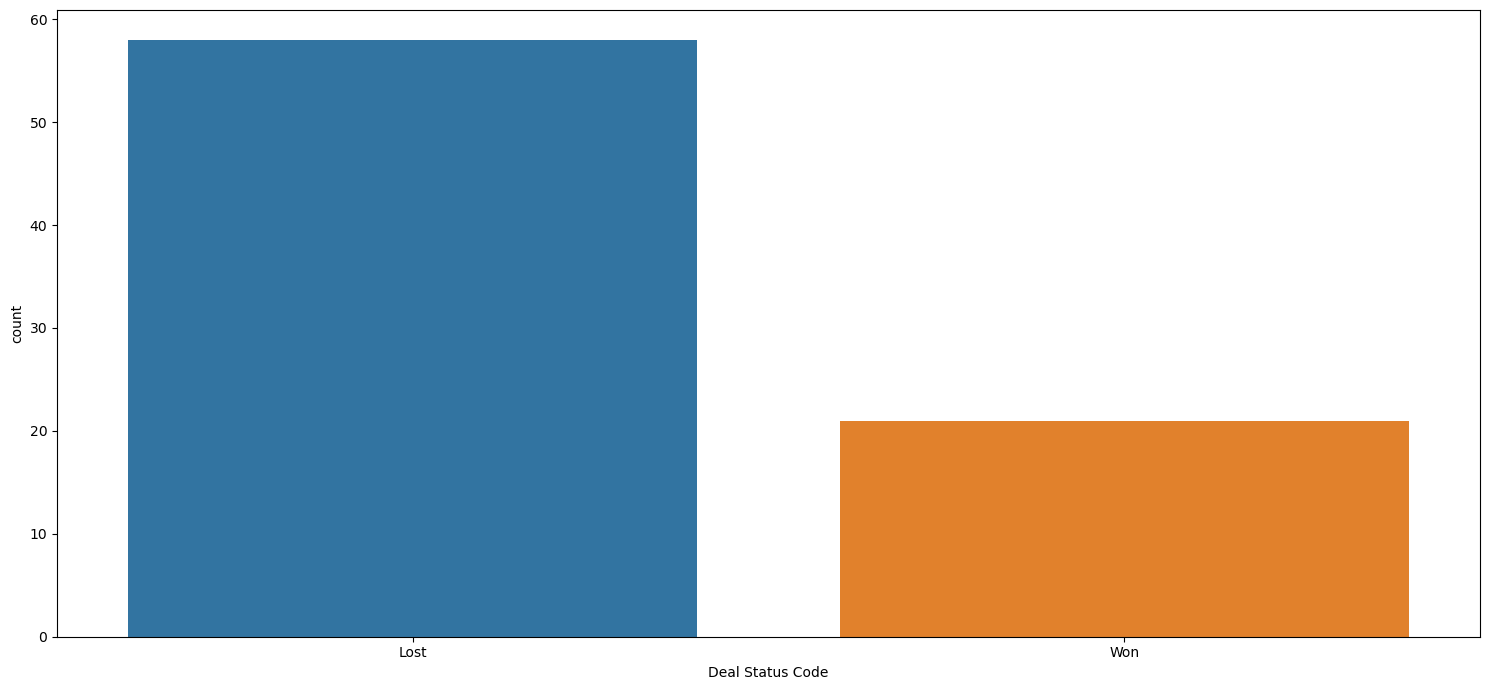

In [75]:
sns.countplot(x= "Deal Status Code" ,data=df)
plt.show()

In [77]:
df["Deal Status Code"].value_counts()

Lost    58
Won     21
Name: Deal Status Code, dtype: int64

# Univariate Analysis

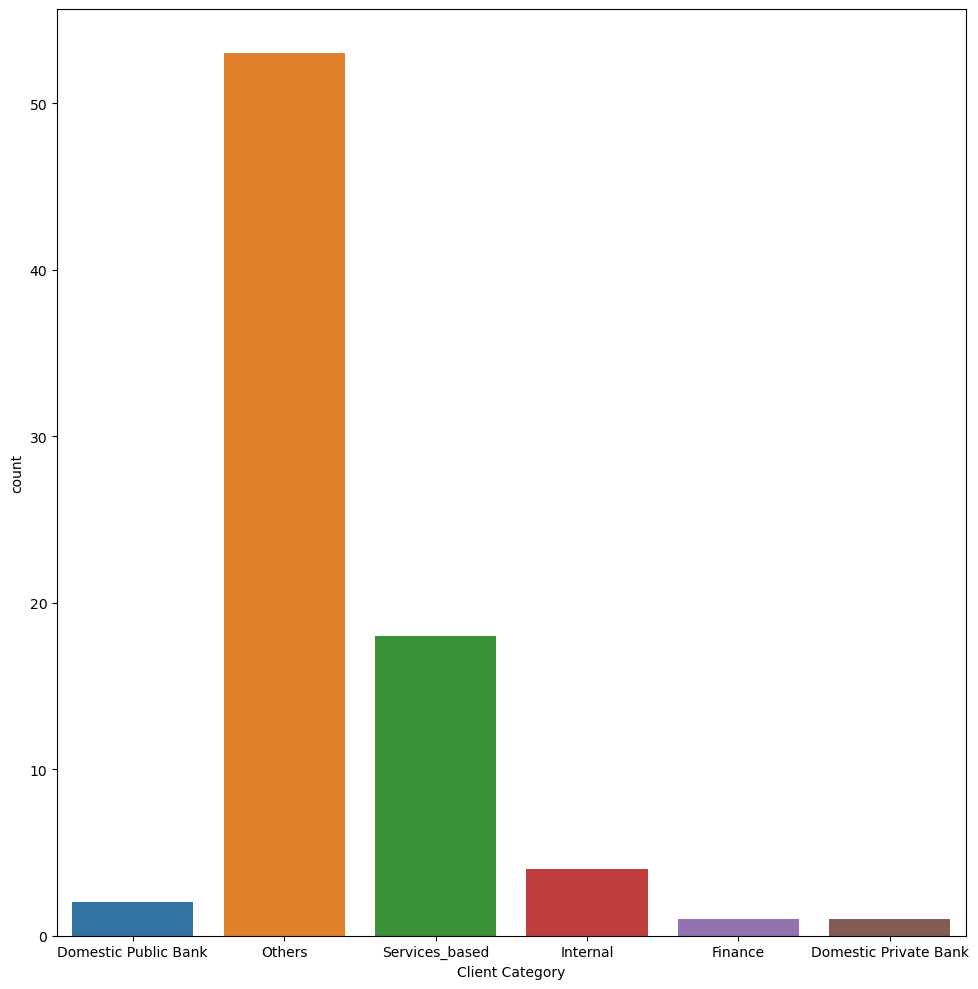

In [29]:
plt.rcParams["figure.figsize"]=[10,10]
sns.countplot(x= "Client Category" ,data=df)
plt.show()

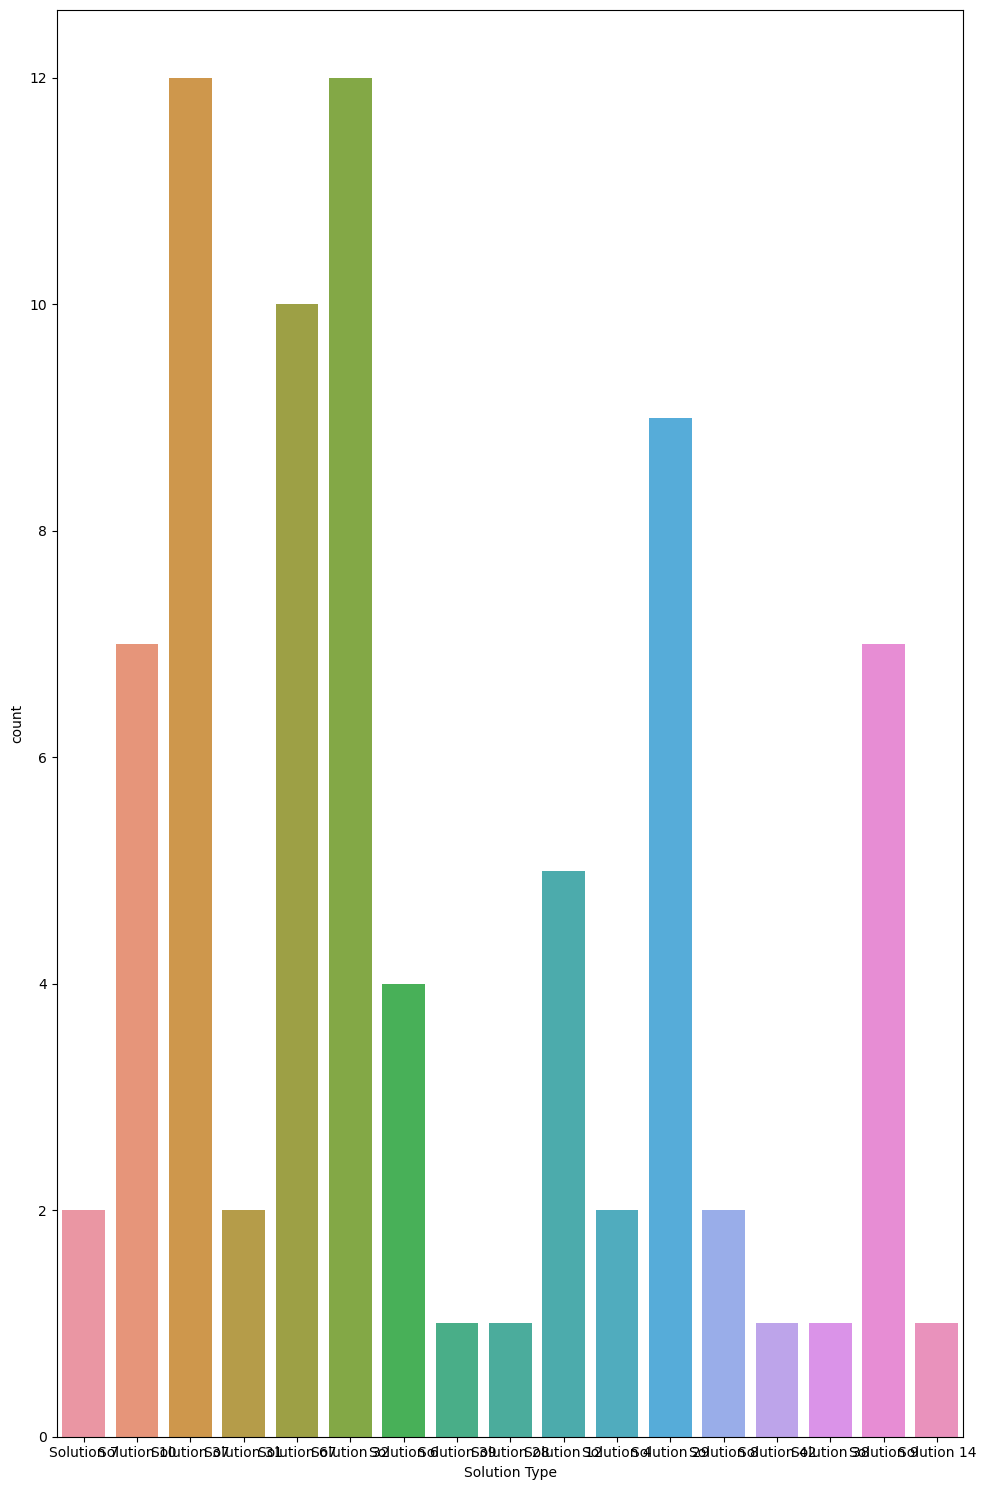

In [34]:
plt.rcParams["figure.figsize"]=[10,15]
sns.countplot(x= "Solution Type" ,data=df)
plt.show()

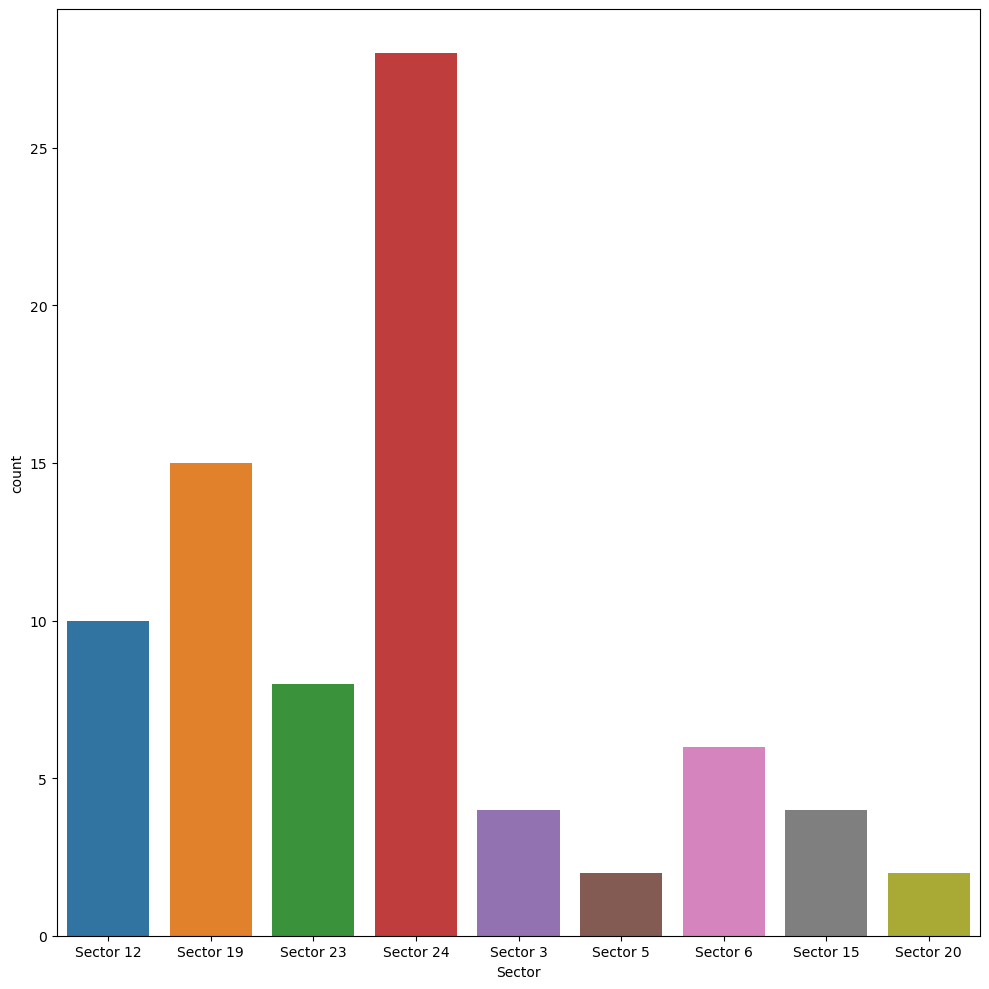

In [36]:
plt.rcParams["figure.figsize"]=[10,10]
sns.countplot(x= "Sector" ,data=df)
plt.show()

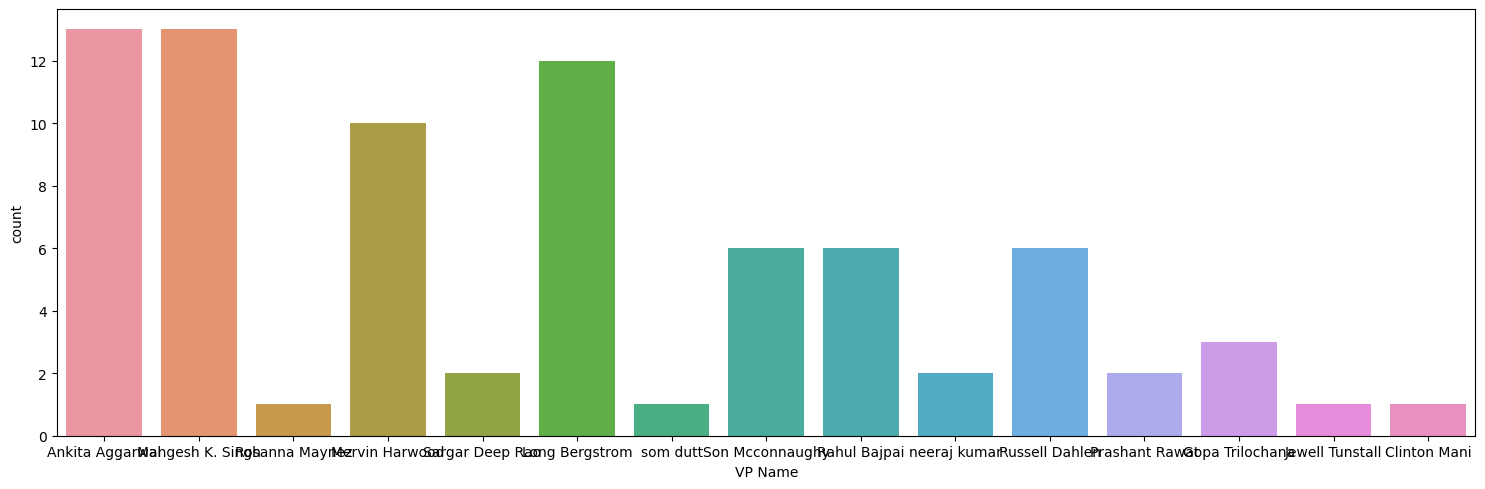

In [42]:
plt.rcParams["figure.figsize"]=[15,5]
sns.countplot(x= "VP Name" ,data=df)
plt.show()

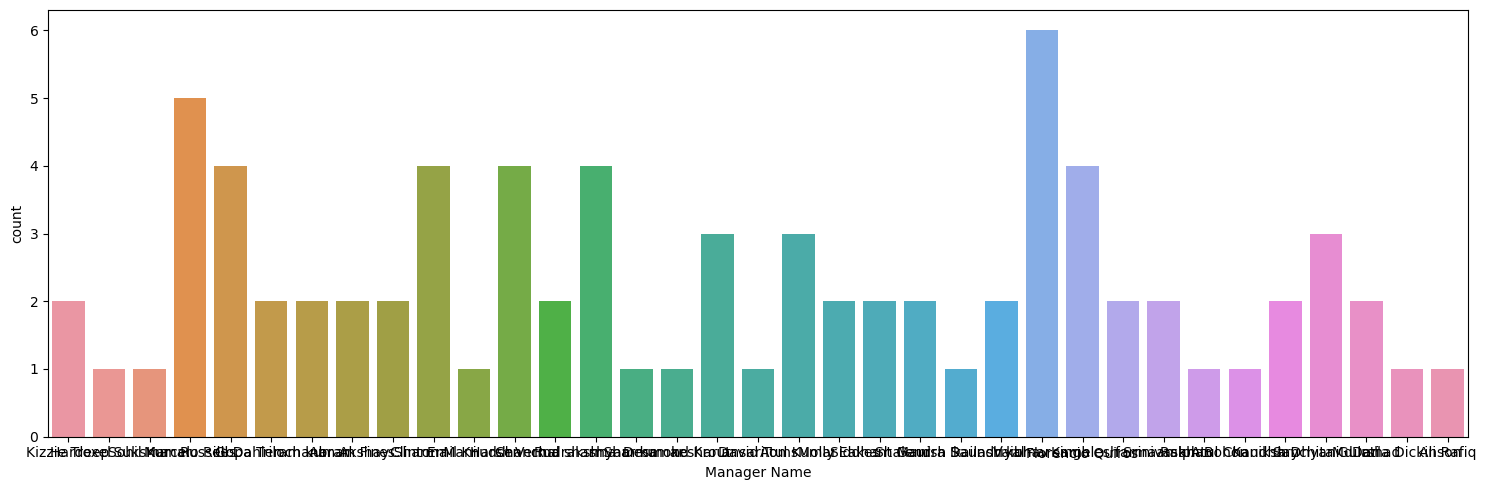

In [43]:
plt.rcParams["figure.figsize"]=[15,5]
sns.countplot(x= "Manager Name" ,data=df)
plt.show()

# Bivariate Analysis

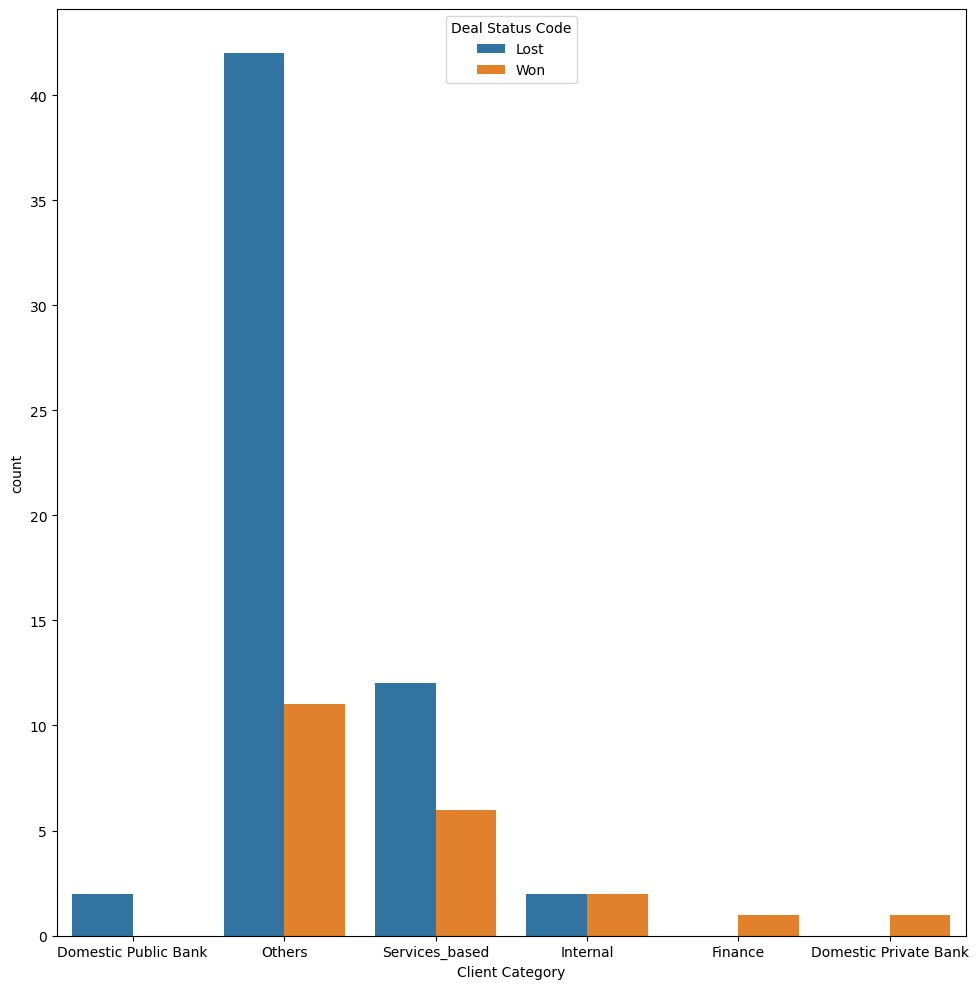

In [30]:
plt.rcParams["figure.figsize"]=[10,10]
sns.countplot(x= "Client Category" ,data=df,hue="Deal Status Code")
plt.show()

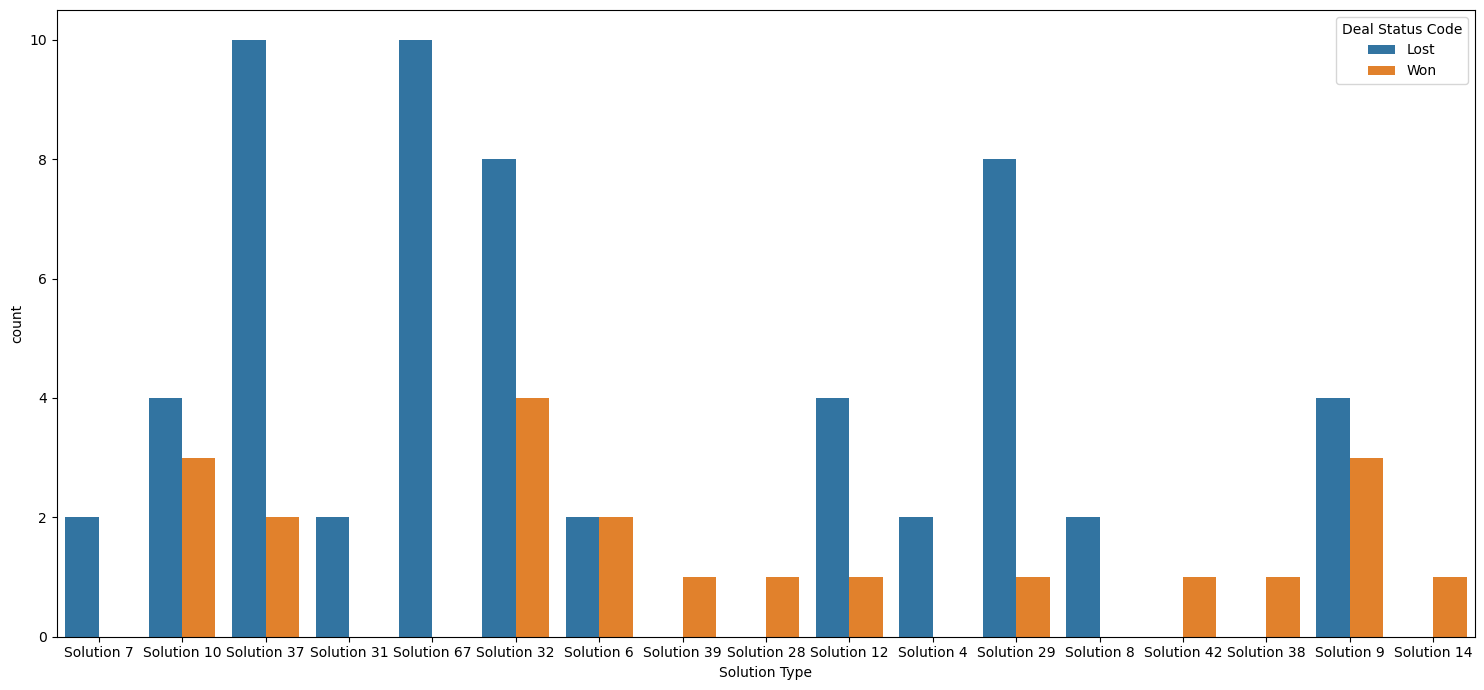

In [46]:
plt.rcParams["figure.figsize"]=[15,7]
sns.countplot(x= "Solution Type" ,data=df,hue="Deal Status Code")
plt.show()

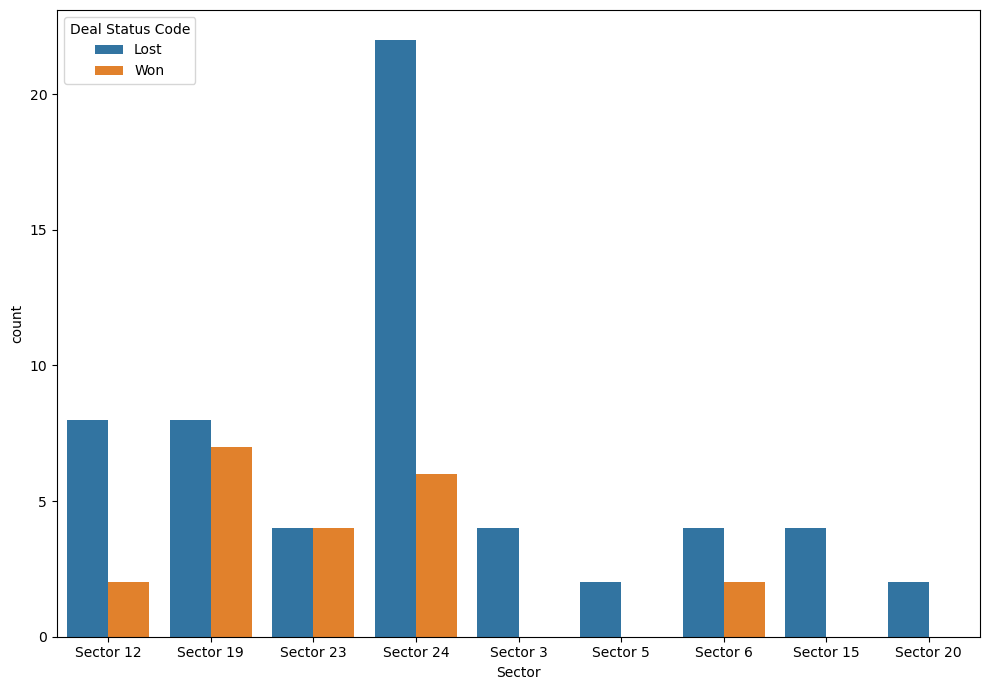

In [49]:
plt.rcParams["figure.figsize"]=[10,7]
sns.countplot(x= "Sector" ,data=df,hue="Deal Status Code")
plt.show()

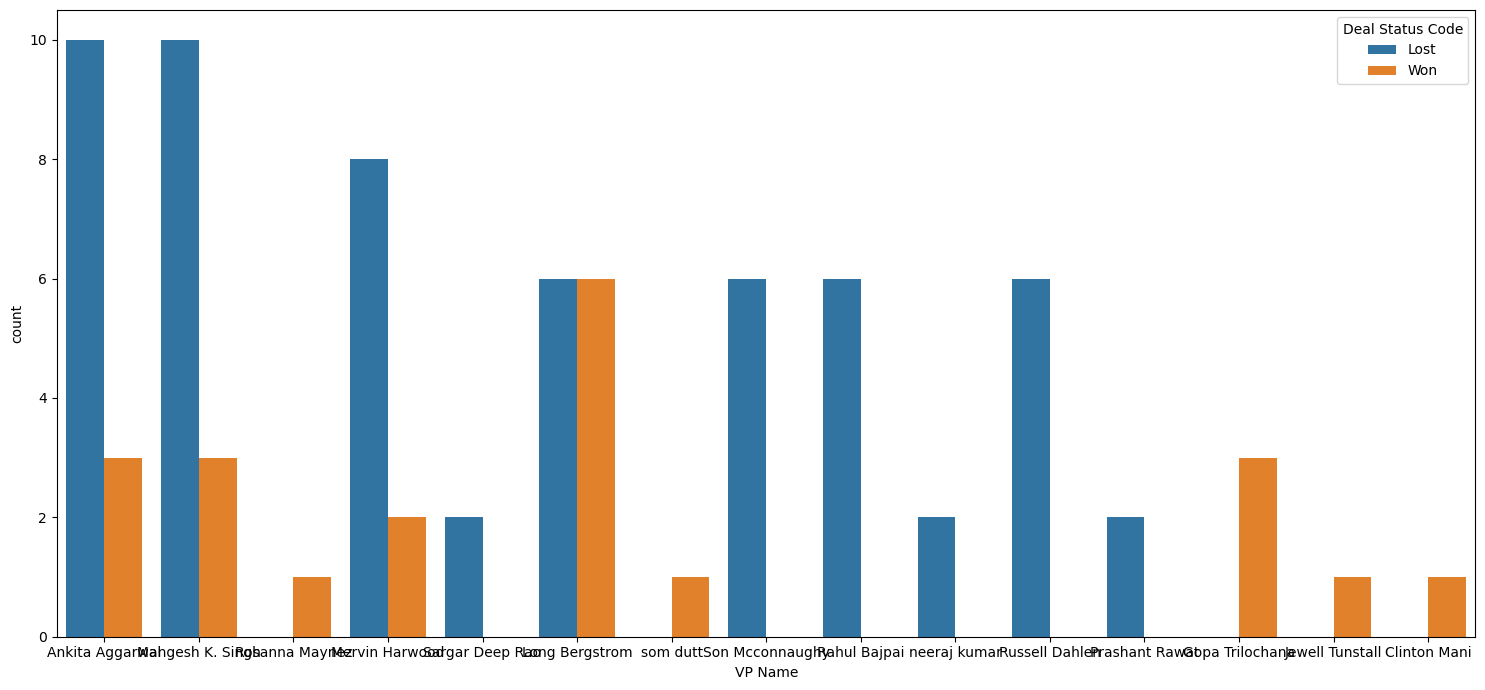

In [51]:
plt.rcParams["figure.figsize"]=[15,7]
sns.countplot(x= "VP Name" ,data=df,hue="Deal Status Code")
plt.show()

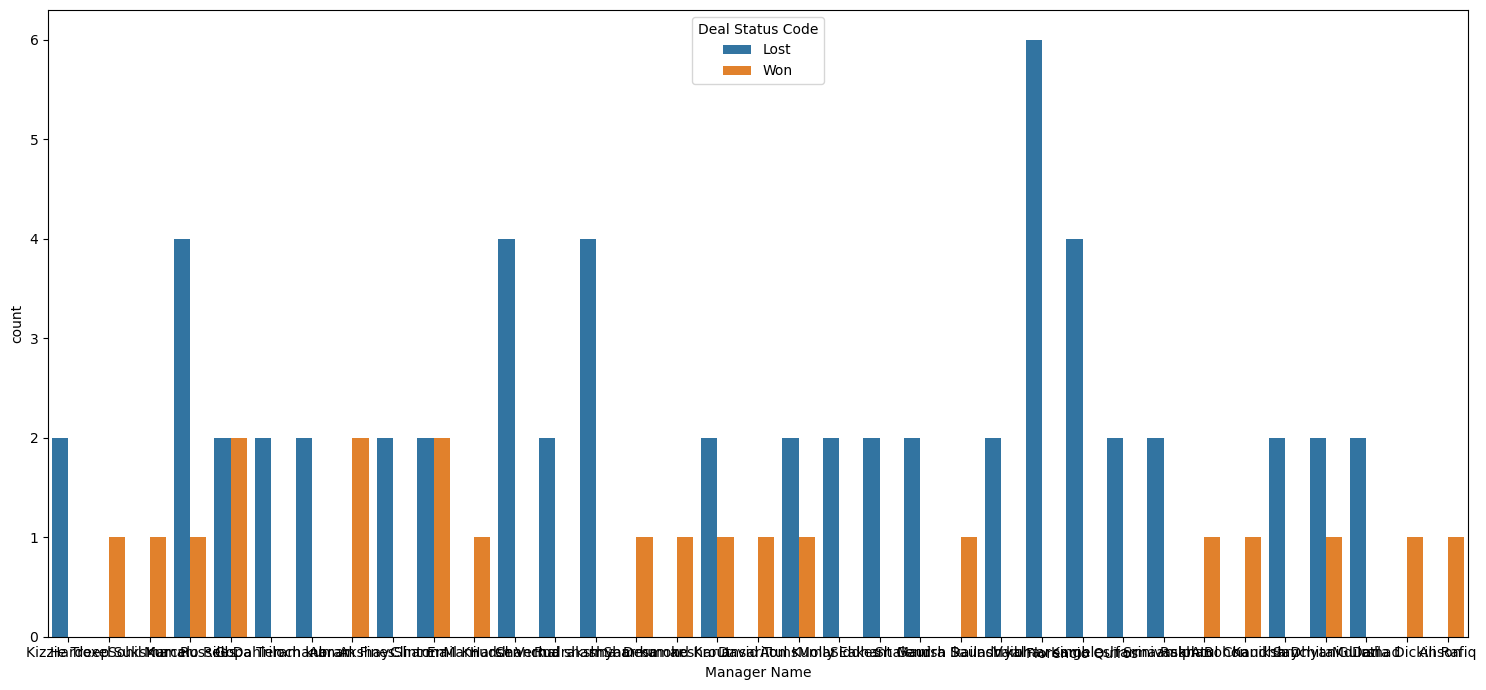

In [52]:
plt.rcParams["figure.figsize"]=[15,7]
sns.countplot(x= "Manager Name" ,data=df,hue="Deal Status Code")
plt.show()

# Multivariate Analysis

<Figure size 4000x2500 with 0 Axes>

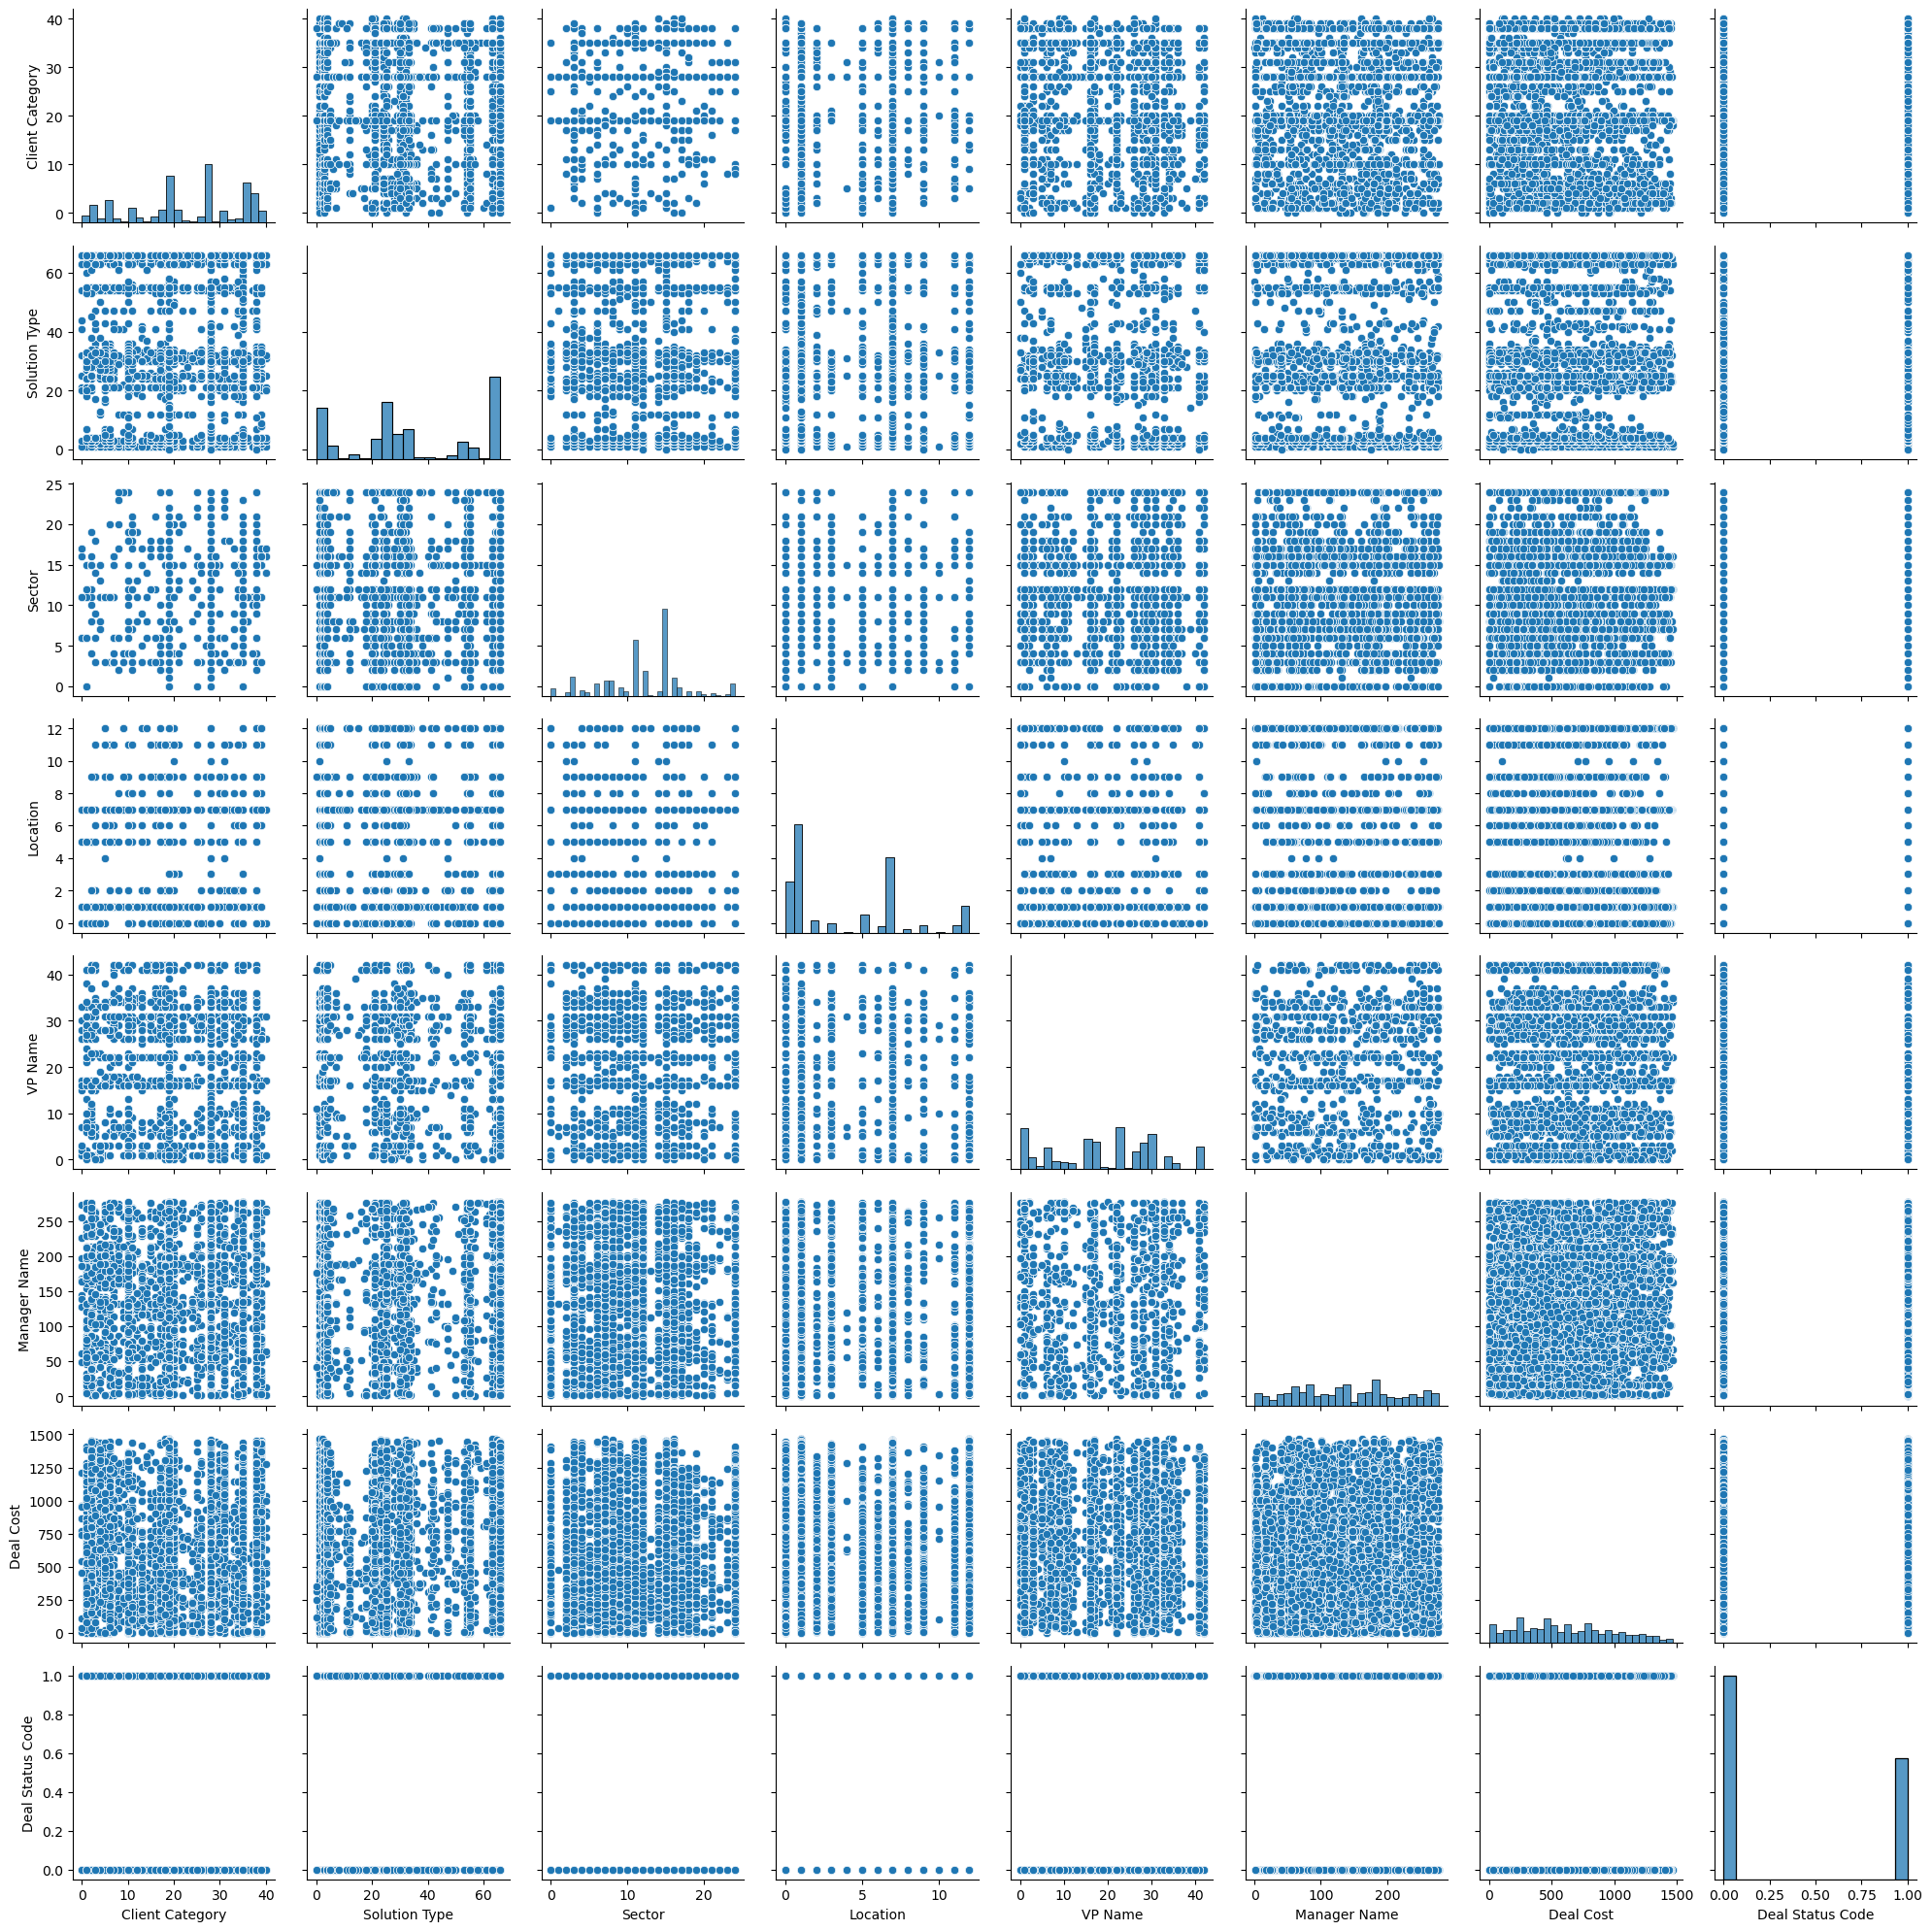

In [53]:
plt.figure(figsize=(40,25))
sns.pairplot(df4)
plt.show()

<Figure size 4000x2500 with 0 Axes>

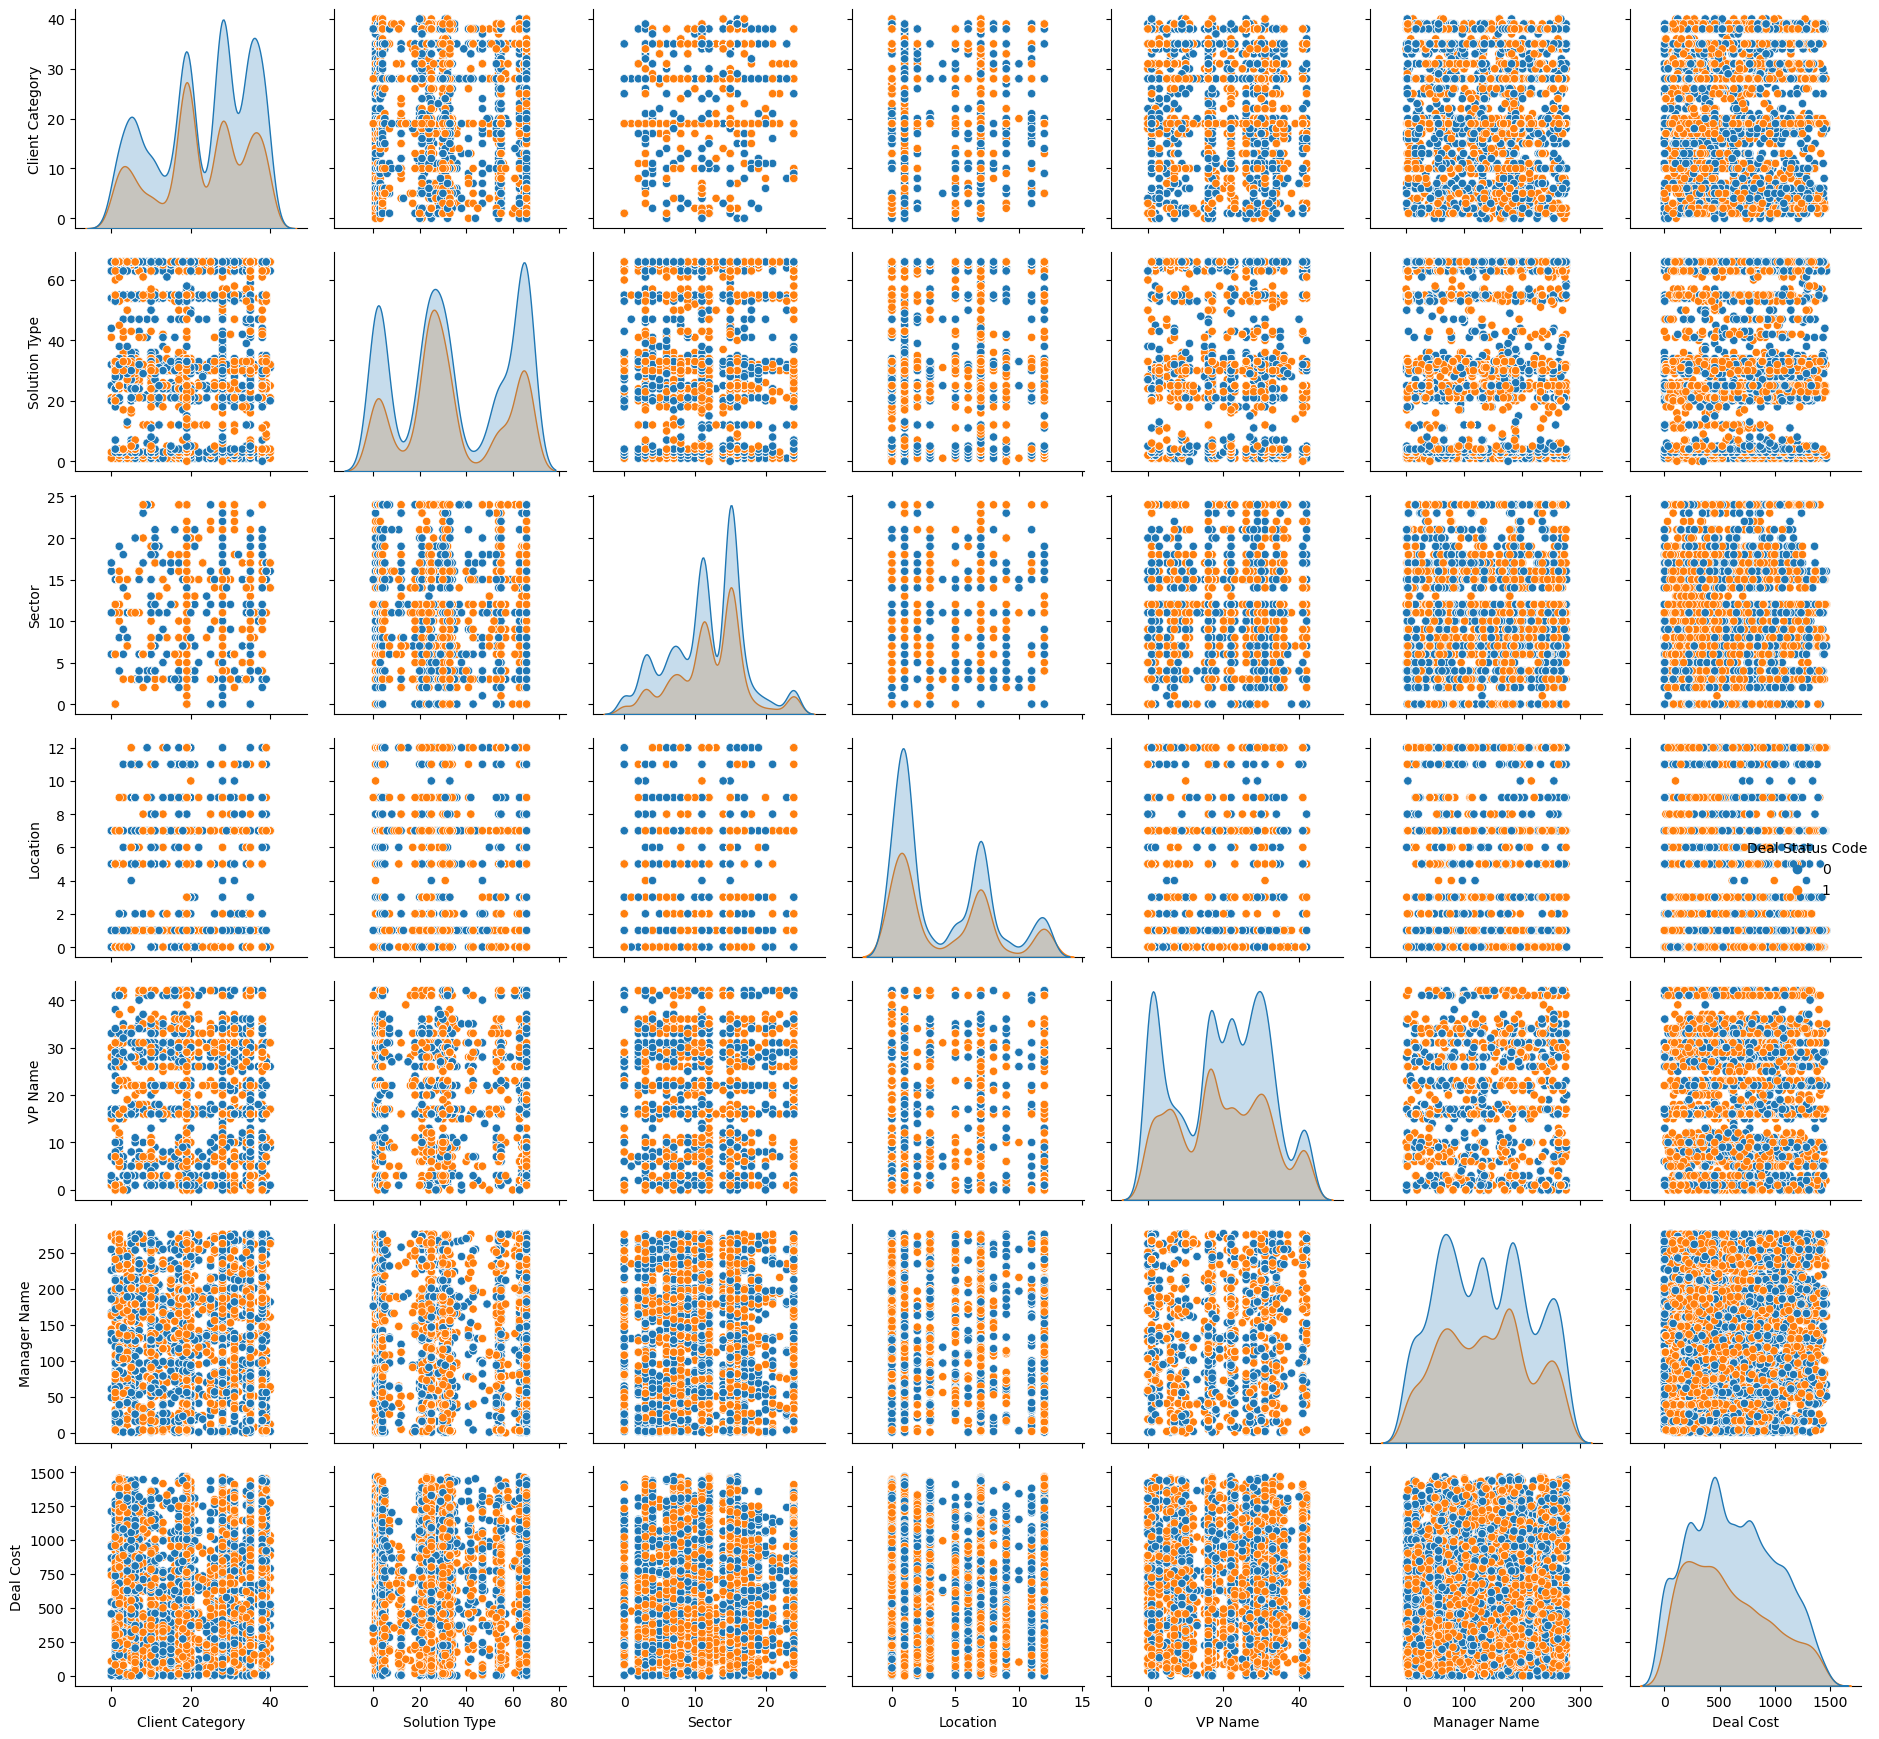

In [54]:
plt.figure(figsize=(40,25))
sns.pairplot(df4, hue="Deal Status Code")
plt.show()

# Model Building

# Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [60]:
df5=df2['Deal Date']
df5.head()

0   2018-10-05
1   2019-01-06
2   2012-01-12
3   2013-11-08
4   2013-09-27
Name: Deal Date, dtype: datetime64[ns]

In [62]:
df6=pd.concat([df4,df5],axis=1)
df6

Client Category  Solution Type  Sector  Location  VP Name  \
0                    6             64       3         1        1   
1                    6             64       3         1        1   
2                   28              1      10         1       17   
3                   28              1      15         1       28   
4                   28             30      16         1       22   
...                ...            ...     ...       ...      ...   
10056               31             66      24         7       29   
10057               19             55      12        12       29   
10058               31             66      24         7       29   
10059               31             58      24         7       19   
10060               28             66       3         1       34   

       Manager Name  Deal Cost  Deal Status Code  Deal Date  
0               116        628                 0 2018-10-05  
1               116        628                 0 2019-01-06  
2                84         51                 1 2012-01-12  
3               203         80                 1 2013-11-08  
4               134        477                 0 2013-09-27  
...             ...        ...               ...        ...  
10056           182        772                 0 2019-03-18  
10057           198        894                 1 2019-03-04  
10058           182        772                 0 2019-02-28  
10059            50       1312                 1 2019-01-27  
10060           216        223                 0 2019-05-30  

[10061 rows x 9 columns]

In [64]:
df6.set_index('Deal Date',inplace=True)
df6

Client Category  Solution Type  Sector  Location  VP Name  \
Deal Date                                                               
2018-10-05                6             64       3         1        1   
2019-01-06                6             64       3         1        1   
2012-01-12               28              1      10         1       17   
2013-11-08               28              1      15         1       28   
2013-09-27               28             30      16         1       22   
...                     ...            ...     ...       ...      ...   
2019-03-18               31             66      24         7       29   
2019-03-04               19             55      12        12       29   
2019-02-28               31             66      24         7       29   
2019-01-27               31             58      24         7       19   
2019-05-30               28             66       3         1       34   

            Manager Name  Deal Cost  Deal Status Code  
Deal Date                                              
2018-10-05           116        628                 0  
2019-01-06           116        628                 0  
2012-01-12            84         51                 1  
2013-11-08           203         80                 1  
2013-09-27           134        477                 0  
...                  ...        ...               ...  
2019-03-18           182        772                 0  
2019-03-04           198        894                 1  
2019-02-28           182        772                 0  
2019-01-27            50       1312                 1  
2019-05-30           216        223                 0  

[10061 rows x 8 columns]

In [66]:
x=df6.drop('Deal Status Code',axis=1)
y=df6['Deal Status Code']

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [68]:
model = LogisticRegression().fit(xtrain,ytrain)

In [70]:
test_pred = model.predict(xtest)
train_pred=model.predict(xtrain)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [73]:
test_accuracy=accuracy_score(ytest,test_pred)
train_accurracy=accuracy_score(ytrain,train_pred)
print('test_accuracy:',test_accuracy,'\n''train_accuracy:',train_accurracy)

test_accuracy: 0.6247101689301093 
train_accuracy: 0.6261005396194262


In [74]:
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1891
           1       0.00      0.00      0.00      1128

    accuracy                           0.62      3019
   macro avg       0.31      0.50      0.38      3019
weighted avg       0.39      0.62      0.48      3019



# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
rf_model = RandomForestClassifier(random_state=888)

In [79]:
rf_model.fit(xtrain,ytrain)
y_pred_rf = rf_model.predict(xtest)
y_pred_rf_train = rf_model.predict(xtrain)

In [80]:
train_accuracy=(accuracy_score(ytrain,y_pred_rf_train))
test_accuracy=(accuracy_score(ytest,y_pred_rf))
print(train_accuracy)
print(test_accuracy)

0.9970178926441352
0.8102020536601524


# Naive bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb_model=GaussianNB().fit(xtrain,ytrain)

In [85]:
nb_model_train_pred = nb_model.predict(xtrain)
nb_model_test_pred = nb_model.predict(xtest)

In [86]:
train_acc = accuracy_score(nb_model_train_pred, ytrain)
test_acc = accuracy_score(nb_model_test_pred, ytest)

train_acc, test_acc

(0.628514626526555, 0.6273600529976814)

In [92]:
print(classification_report(ytest,nb_model_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1891
           1       0.54      0.02      0.03      1128

    accuracy                           0.63      3019
   macro avg       0.59      0.50      0.40      3019
weighted avg       0.60      0.63      0.49      3019



# XG Boost

In [94]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(xtrain, ytrain)
xgb_y_predict = xgb_model.predict(xtest)
xgb_y_predict_train = xgb_model.predict(xtrain)

In [95]:
train_accuracy=(accuracy_score(ytrain,xgb_y_predict_train))
test_accuracy=(accuracy_score(ytest,xgb_y_predict))
print(train_accuracy)
print(test_accuracy)

0.9245952854302755
0.78767803908579


In [96]:
print(classification_report(ytest,xgb_y_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1891
           1       0.78      0.60      0.68      1128

    accuracy                           0.79      3019
   macro avg       0.79      0.75      0.76      3019
weighted avg       0.79      0.79      0.78      3019

